In [1]:
# Importing necessary libraries and modules
import os
import datetime
import numpy as np
import pandas as pd
import utils
import seaborn as sns
from matplotlib import image
import matplotlib.pyplot as plt


In [2]:
# Load data
cases = pd.read_csv("./data/covid/africa_daily_time_series_cases.csv")
deaths = pd.read_csv("./data/covid/africa_daily_time_series_deaths.csv")
recoveries = pd.read_csv("./data/covid/africa_daily_time_series_recovered.csv")

In [3]:
first_month_cases = cases.loc[:, cases.iloc[:,3:13].columns.values]
first_month_cases[(first_month_cases > 0).all(1)]



,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20


In [4]:
#Convert columns to datetime
dates = pd.to_datetime(cases.iloc[:, 3:,].columns.values).to_series()
month_end_dates = dates.groupby(dates.index.month).apply(lambda x: x.index.max())
month_end_dates = month_end_dates.apply(lambda x: x.strftime('%#m/%d/%y')).to_numpy()
# pd.to_datetime(month_end_dates, format='%d/%m/%Y')

In [5]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

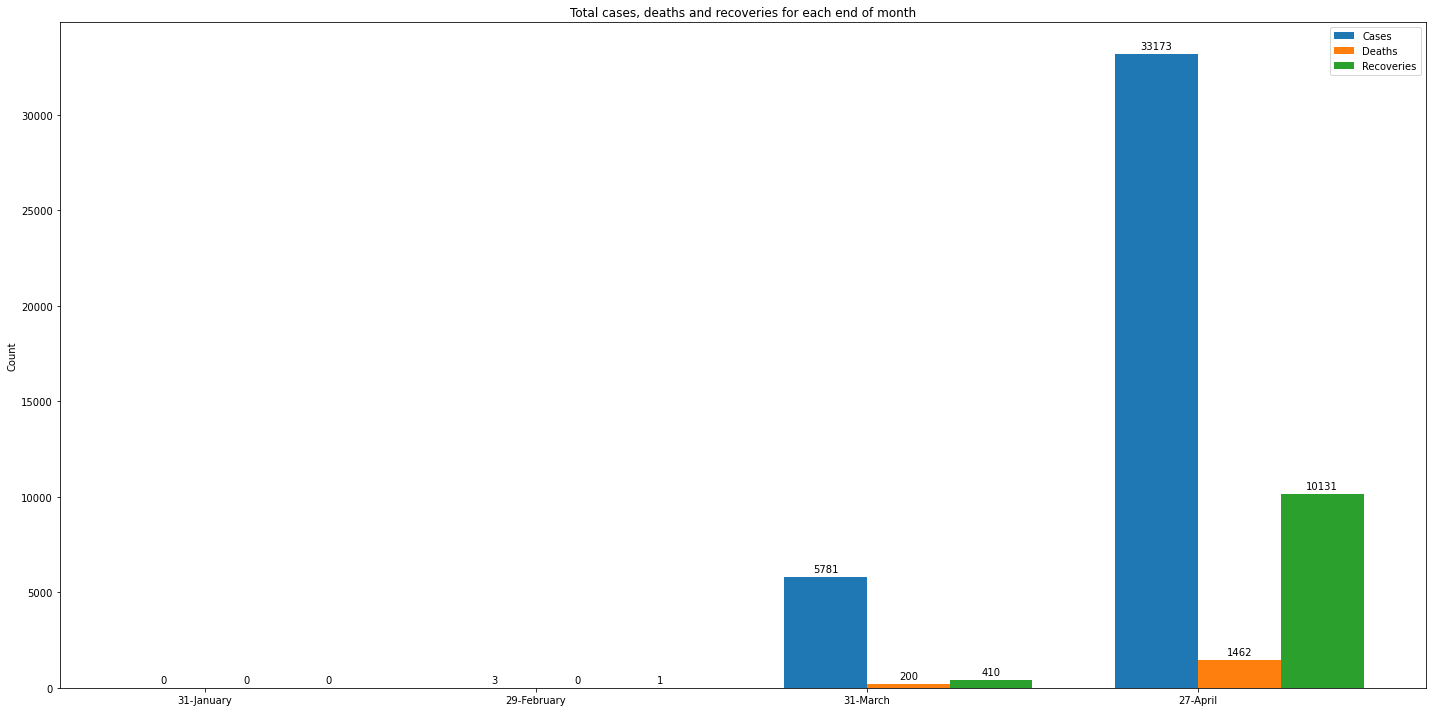

In [6]:
selected_columns = np.insert(month_end_dates, 0, ['Country/Region'])
month_end_stats =  cases[selected_columns]
month_labels = []
for i in range(len(month_end_dates)):
    month_labels.append(datetime.datetime.strptime(month_end_dates[i],'%m/%d/%y').strftime("%d-%B"))
month_labels
month_end_totals = pd.DataFrame(index=month_end_dates, columns=['TotalCases', 'TotalDeaths','TotalRecoveries'])
# print(month_end_stats[month_end_dates].sum().sum())
fig, ax = plt.subplots(figsize=(20,10))
width=0.25
x = np.arange(len(month_labels))
month_end_totals.TotalCases = cases[month_end_dates].sum()
month_end_totals.TotalDeaths = deaths[month_end_dates].sum()
month_end_totals.TotalRecoveries = recoveries[month_end_dates].sum()
bar1 = ax.bar(x - width/2 , month_end_totals.TotalCases, width, label="Cases")
bar2 = ax.bar(x + width/2, month_end_totals.TotalDeaths, width, label="Deaths")
bar3 = ax.bar(x + (width/2 * 3),  month_end_totals.TotalRecoveries, width, label="Recoveries")
ax.set_ylabel('Count')
ax.set_title('Total cases, deaths and recoveries for each end of month')
ax.set_xticks(x)
ax.set_xticklabels(month_labels)
ax.legend()
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
plt.show()
# month_end_totals.plot.bar( title="Total cases, deaths, and recoveries as the end of the month", figsize=(10, 10), legend=True)




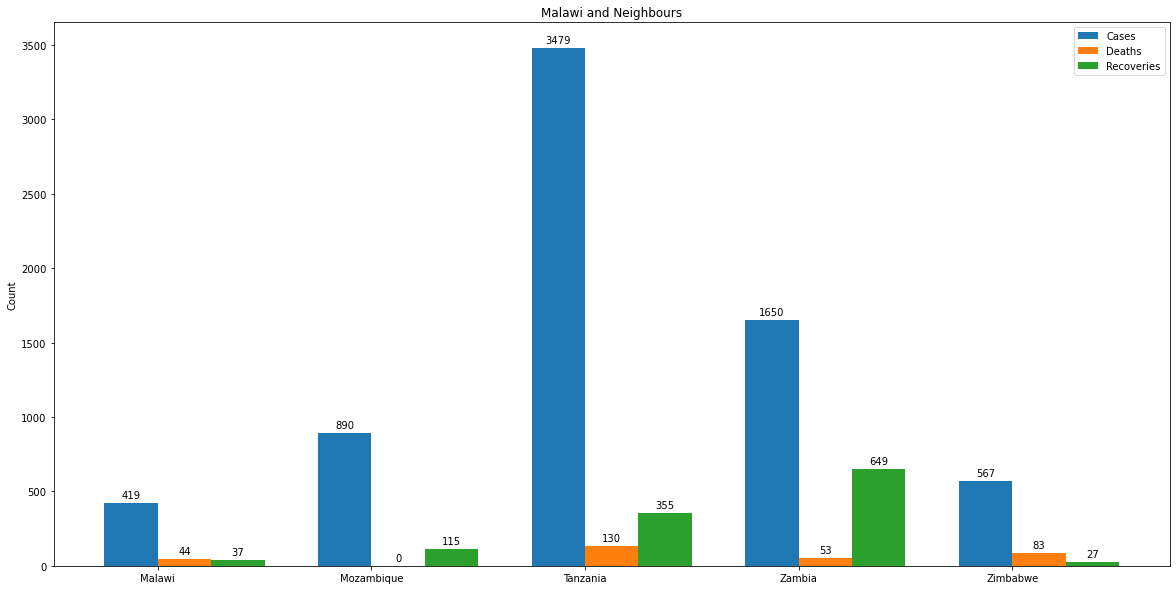

In [7]:
neighbour_countries = ['Malawi', 'Mozambique', 'Tanzania', 'Zambia','Zimbabwe']
neighbours = cases[cases['Country/Region'].isin(neighbour_countries)].iloc[:,3:,]
neighbours = cases[cases['Country/Region'].isin(neighbour_countries)].iloc[:,3:,]
neighbours['TotalCases'] = neighbours.apply(lambda x: x.sum(), axis=1)
neighbours['TotalDeaths'] = deaths[deaths['Country/Region'].isin(neighbour_countries)].iloc[:,3:,].apply(lambda x: x.sum(), axis=1)
neighbours['TotalRecoveries'] = recoveries[recoveries['Country/Region'].isin(neighbour_countries)].iloc[:,3:,].apply(lambda x: x.sum(), axis=1)
neighbours.insert(0, column='Country/Region', value=cases['Country/Region'])
fig, ax = plt.subplots(figsize=(20,10))
width=0.25
x = np.arange(len(neighbour_countries))
bar1 = ax.bar(x - width /2 , neighbours.TotalCases, width, label="Cases")
bar2 = ax.bar(x +  width/2, neighbours.TotalDeaths, width, label="Deaths")
bar3 = ax.bar(x + (width/2 * 3),  neighbours.TotalRecoveries, width, label="Recoveries")

ax.set_ylabel('Count')
ax.set_title('Malawi and Neighbours')
ax.set_xticks(x)
ax.set_xticklabels(neighbour_countries)
ax.legend()
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
plt.show()
# neighbours.plot.bar(x='Country/Region', y=['TotalCases', 'TotalDeaths', 'TotalRecoveries'], figsize=(20,10), title="Malawi and Neighbours")



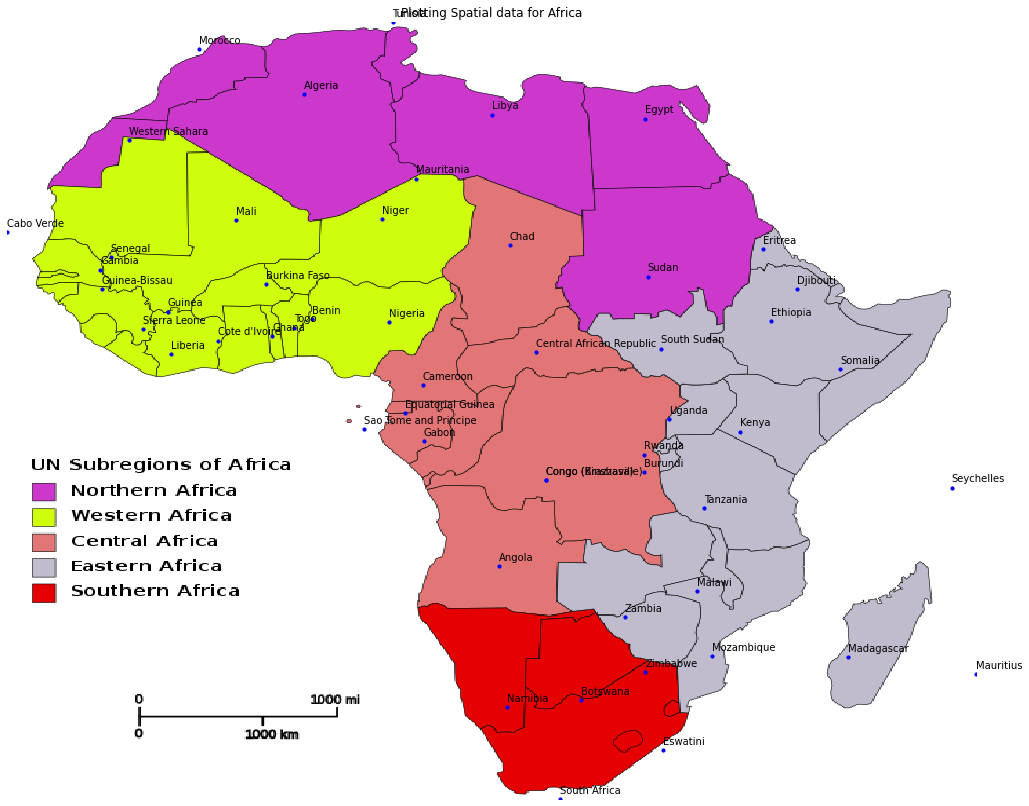

In [8]:
map = plt.imread('./data/covid/AfricaRegions.png')
cordinates = (cases.Long.min(), cases.Long.max(), cases.Lat.min(), cases.Lat.max())
fig, ax = plt.subplots(figsize=(14.4, 14.04), frameon=False)
ax.scatter(cases.Long, cases.Lat, zorder=2, c='b', s=10)
for idx, row in cases.iterrows():
    ax.text(row.Long, row.Lat + 0.5, row['Country/Region'])
ax.axis('off')
ax.set_title('Plotting Spatial data for Africa')
ax.set_xlim(cordinates[0],cordinates[1])
ax.set_ylim(cordinates[2],cordinates[3])
ax.imshow(map, zorder=0, extent=cordinates, aspect="equal", interpolation='nearest')
plt.tight_layout()

In [9]:
data = [cases, deaths, recoveries]
regions = ['Northern', 'Eastern', 'Central', 'Western', 'Southern']
averages = []
n_months = len(month_end_dates)
for i in range(len(regions)):
    region_cases = cases[cases['Country/Region'].isin(getattr(utils, regions[i].lower())())]
    region_deaths = deaths[deaths['Country/Region'].isin(getattr(utils, regions[i].lower())())]
    region_recoveries = recoveries[recoveries['Country/Region'].isin(getattr(utils, regions[i].lower())())]

    total_case_averages = region_cases.iloc[:, 3:,].sum().sum() / n_months
    total_death_averages = region_deaths.iloc[:, 3:,].sum().sum() / n_months
    total_recovery_averages = region_recoveries.iloc[:, 3:,].sum().sum() / n_months
    averages.append([regions[i], total_case_averages, total_death_averages, total_recovery_averages])


In [10]:
data = pd.DataFrame(averages, columns=['Region', 'Cases/m', 'Death/m', 'Recoveries/m'])
rankings = data.sort_values(by=['Cases/m', 'Death/m']).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20,10))
width=0.25
x = np.arange(len(regions))
bar1 = ax.bar(x - width /2 , rankings['Cases/m'], width, label="Cases")
bar2 = ax.bar(x +  width/2, rankings['Death/m'], width, label="Deaths")
bar3 = ax.bar(x + (width/2 * 3),  rankings['Recoveries/m'], width, label="Recoveries")

ax.set_ylabel('Count')
ax.set_title('Ranking of African regions affected with Covid')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
plt.show()
# data.sort_values(by=['Cases/m', 'Death/m']).reset_index(drop=True).plot.barh(x="Region", figsize=(20, 10), title="Ranking of African regions affected with Covid")



NameError: name 'labels' is not defined